## Kaggle Competition | Titanic Machine Learning from Disaster

## This is the starting description of the competition

### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


In [1]:
#import library to read and plot the data

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from patsy import dmatrices,dmatrix 
import string
from operator import itemgetter
from sklearn.externals import joblib

In [2]:
#read data using pandas library
df=pd.read_csv('./dataset/train.csv') 

In [3]:
#df.describe()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Reading the info of the DataFrame, it is evident that the Cabin feature has a lot of null values. So, it will not be useful for our prediction. It is better to drop it down.

The Age feature has a great number of null values, but we suppose that the age of a passenger can be very relevant for his destiny in this disaster. 177 passengers have null Age values. To take advantages of a full set for this features, it will be useful to make imputation for the missing values.


## Phase 1 - Visualising Data

##### Now let’s have a deeper look at the data, trying to understand which could be the most important features for our model and let's take a quick look at our data graphically:

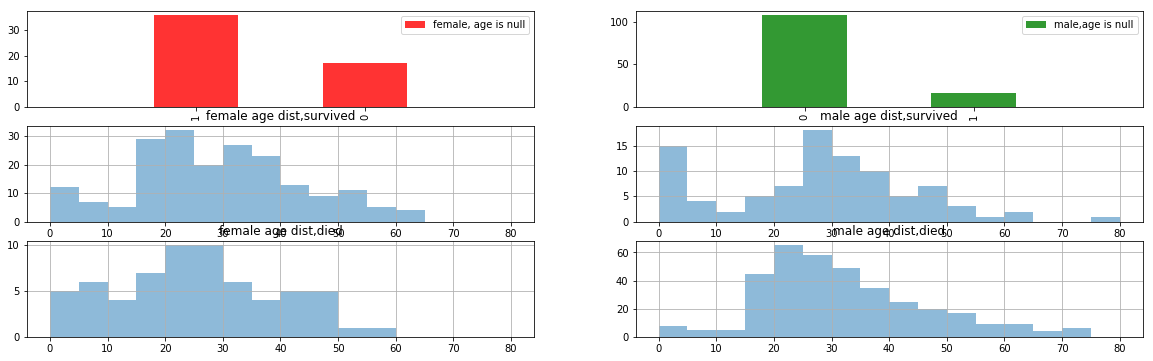

In [4]:
fig = plt.figure(figsize=(20,6))
a=0.8
ax1 = fig.add_subplot(3,2,1) 
female = df.Survived[df.Sex == 'female'][df['Age'].isnull()].value_counts()
female.plot(kind='bar', label='female, age is null',color='red', alpha=a)
ax1.set_xlim(-1, len(female))
plt.legend(loc='best')
ax2 = fig.add_subplot(3,2,2) 
male= df.Survived[df.Sex == 'male'][df['Age'].isnull()].value_counts()
male.plot(kind='bar', label='male,age is null', alpha=a, color='green')
ax2.set_xlim(-1, len(male))
plt.legend(loc='best')
 
ax3 = fig.add_subplot(3,2,3) 
df.Age[df.Sex == 'female'][df.Survived==1] .dropna().hist(bins=16, range=(0,80), alpha = .5)
ax3.set_title('female age dist,survived')
 
ax4 = fig.add_subplot(3,2,4)
df.Age[df.Sex == 'male'][df.Survived==1] .dropna().hist(bins=16, range=(0,80), alpha = .5)
ax4.set_title('male age dist,survived') 
 
#subplots_adjust(bottom=0.1, right=0.8, top=2)
ax5 = fig.add_subplot(3,2,5) 
df.Age[df.Sex == 'female'][df.Survived==0] .dropna().hist(bins=16, range=(0,80), alpha = .5)
ax5.set_title('female age dist,died')
 
ax6 = fig.add_subplot(3,2,6) 
df.Age[df.Sex == 'male'][df.Survived==0] .dropna().hist(bins=16, range=(0,80), alpha = .5)
ax6.set_title('male age dist,died')
plt.show()
 
 

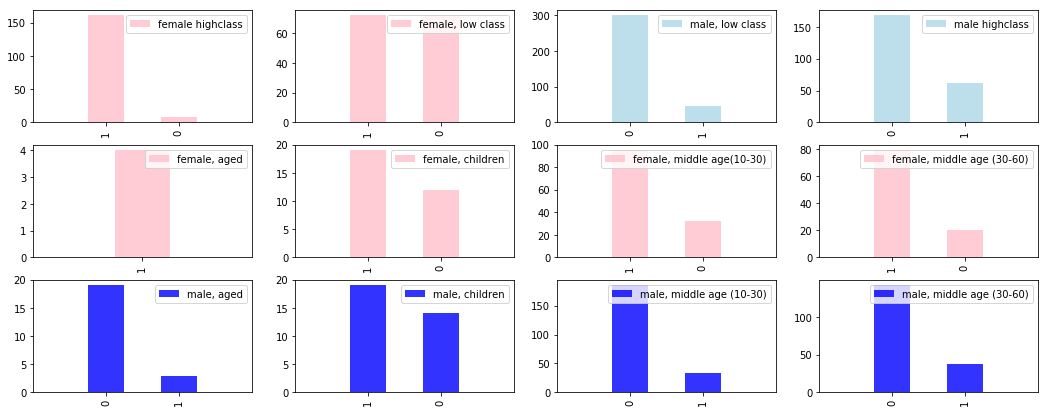

In [5]:
fig = plt.figure(figsize=(18,12))
a=0.8
 
##gender and class
ax3 = fig.add_subplot(545)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='pink', alpha=a)
 
ax3.set_xlim(-1, len(female_highclass))
plt.legend(loc='best')
ax4 = fig.add_subplot(546)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax4.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax5 = fig.add_subplot(5,4,7) 
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax5.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')
ax6 = fig.add_subplot(5,4,8) 
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='lightblue')
 
ax6.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
 
##gender and age
#female
ax7 = fig.add_subplot(5,4,9)
female_aged = df.Survived[df.Sex == 'female'][df.Age >= 60].value_counts()
female_aged.plot(kind='bar', label='female, aged', color='pink', alpha=a)
 
ax7.set_xlim(-1, len(female_aged))
plt.legend(loc='best')
ax8 = fig.add_subplot(5,4,10)
female_child = df.Survived[df.Sex == 'female'][df.Age <= 10].value_counts()
female_child.plot(kind='bar', label='female, children', color='pink', alpha=a)
 
ax8.set_xlim(-1, len(female_child))
plt.legend(loc='best')
ax9 = fig.add_subplot(5,4,11)
female_middleage = df.Survived[df.Sex == 'female'][df.Age>10][df.Age<=30].value_counts()
female_middleage.plot(kind='bar', label='female, middle age(10-30)', color='pink', alpha=a)
 
ax9.set_xlim(-1, len(female_middleage))
plt.legend(loc='best')
ax9 = fig.add_subplot(5,4,12)
female_middleage = df.Survived[df.Sex == 'female'][df.Age>30][df.Age<60].value_counts()
female_middleage.plot(kind='bar', label='female, middle age (30-60)', color='pink', alpha=a)
 
ax9.set_xlim(-1, len(female_middleage))
plt.legend(loc='best')
 
#male
 
ax10 = fig.add_subplot(5,4,13)
male_aged = df.Survived[df.Sex == 'male'][df.Age >= 60].value_counts()
male_aged.plot(kind='bar', label='male, aged', color='blue', alpha=a)
 
ax10.set_xlim(-1, len(male_aged))
plt.legend(loc='best')
ax11 = fig.add_subplot(5,4,14)
male_child = df.Survived[df.Sex == 'male'][df.Age <= 10].value_counts()
male_child.plot(kind='bar', label='male, children', color='blue', alpha=a)
 
ax11.set_xlim(-1, len(male_child))
plt.legend(loc='best')
ax12 = fig.add_subplot(5,4,15)
male_middleage = df.Survived[df.Sex == 'male'][df.Age>10][df.Age<=30].value_counts()
male_middleage.plot(kind='bar', label='male, middle age (10-30)', color='blue', alpha=a)
 
ax12.set_xlim(-1, len(male_middleage))
plt.legend(loc='best') 
ax12 = fig.add_subplot(5,4,16)
male_middleage = df.Survived[df.Sex == 'male'][df.Age>30][df.Age<60].value_counts()
male_middleage.plot(kind='bar', label='male, middle age (30-60)', color='blue', alpha=a)
 
ax12.set_xlim(-1, len(male_middleage))
plt.legend(loc='best') 


#### Interesting observation:  If you are female and aged you have Provability=1 to survive. If you are highclass, male and female, you have a high probability to survive. If you are children you have more or less the same surviving probability, gender independent.

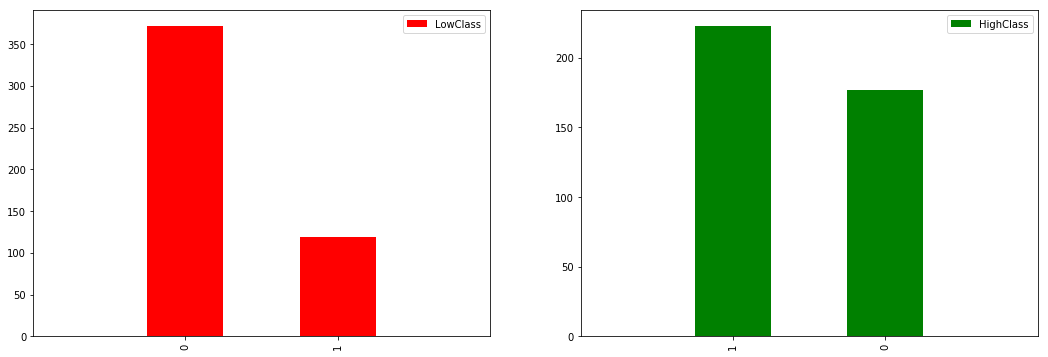

In [6]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
df.Survived[df.Pclass == 3].value_counts().plot(kind='bar',label='LowClass',color='red')
ax1.set_xlim(-1, 2)
plt.legend(loc='best')
ax2 = fig.add_subplot(122) 
df.Survived[df.Pclass != 3].value_counts().plot(kind='bar',label='HighClass',color='green')
ax2.set_xlim(-1, 2)
plt.legend(loc='best')

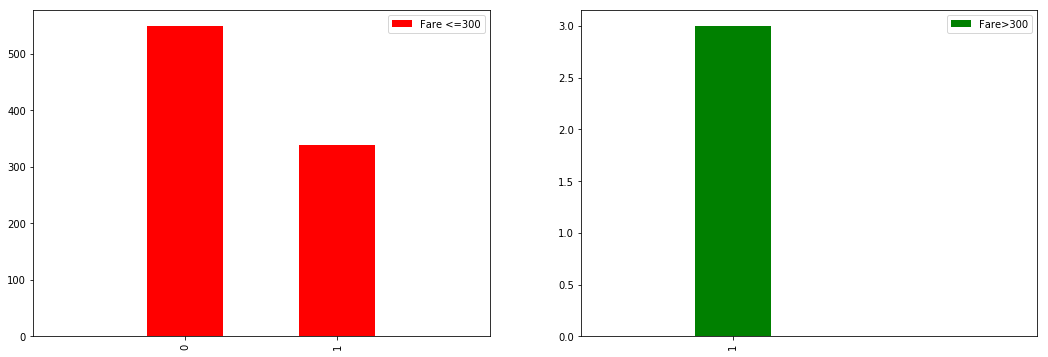

In [7]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
df.Survived[df.Fare <=300].value_counts().plot(kind='bar',label='Fare <=300',color='red')
ax1.set_xlim(-1, 2)
plt.legend(loc='best')
ax2 = fig.add_subplot(122) 
df.Survived[df.Fare >300].value_counts().plot(kind='bar',label='Fare>300',color='green')
ax2.set_xlim(-1, 2)
plt.legend(loc='best')

##### So, as we could have imagined, being women, high-class is a good passport for surviving

In [8]:
for i in range(1,4):
    print(('Male:'), i, len(df[ (df.Sex == 'male') & (df.Pclass == i) ]))
    print(('Female:'), i, len(df[ (df.Sex == 'female') & (df.Pclass == i) ]))

Male: 1 122
Female: 1 94
Male: 2 108
Female: 2 76
Male: 3 347
Female: 3 144


##### Male, low class-->high dead probability

## Data cleaning:

Now we could clean, impute, encode the data to have a better model for our prediction. What it is important is the imputation of age. We realize now that if you are aged and female, you will survive. If you are high class and aged are more probabible to survive. We now are going to translate these conclusion in the model

## Phase 2 - Training:

In [9]:
#np.shape(y_test)

In [10]:
import numpy as np
import pandas as pd
from pandas import  DataFrame
import string
from operator import itemgetter
#json library for settings file
import json
# import the machine learning library that holds the randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report

train_file='./dataset/train.csv'
test_file='./dataset/test.csv'
seed= 0

print (train_file,seed)

./dataset/train.csv 0


In [11]:
#Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

#Utility function to clean and munge data
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print (big_string)
    return np.nan

le = preprocessing.LabelEncoder()
enc= preprocessing.OneHotEncoder()

def clean_and_munge_data(df):
    #Setting unknown values to NaN
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    #Creating a title column from name
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
    
    #Replacing all titles with mr, mrs, miss, master for our ease
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)

    #Creating new family_size column
    df['Family_Size']=df['SibSp']+df['Parch']
    df['Family']=df['SibSp']*df['Parch']

    #Imputing NaN values
    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())

    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    #Filling missing age values with average of that particular category
    df['AgeFill']=df['Age']
    mean_ages = np.zeros(4)
    mean_ages[0]=np.average(df[df['Title'] == 'Miss']['Age'].dropna())
    mean_ages[1]=np.average(df[df['Title'] == 'Mrs']['Age'].dropna())
    mean_ages[2]=np.average(df[df['Title'] == 'Mr']['Age'].dropna())
    mean_ages[3]=np.average(df[df['Title'] == 'Master']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Master') ,'AgeFill'] = mean_ages[3]
    
    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'

    df.Embarked = df.Embarked.fillna('S')
    print("Considering special case for cabins")

    #Special case for cabins as NaN may be signal
    df.loc[ df.Cabin.isnull()==True,'Cabin'] = 0.5
    df.loc[ df.Cabin.isnull()==False,'Cabin'] = 1.5
   
    #Fare per person
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

    #Age times class
    df['AgeClass']=df['AgeFill']*df['Pclass']
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']


    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 'Low'
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 'High'


    le.fit(df['Sex'] )
    x_sex=le.transform(df['Sex'])
    df['Sex']=x_sex.astype(np.float)

    le.fit( df['Ticket'])
    x_Ticket=le.transform( df['Ticket'])
    df['Ticket']=x_Ticket.astype(np.float)

    le.fit(df['Title'])
    x_title=le.transform(df['Title'])
    df['Title'] =x_title.astype(np.float)

    le.fit(df['HighLow'])
    x_hl=le.transform(df['HighLow'])
    df['HighLow']=x_hl.astype(np.float)


    le.fit(df['AgeCat'])
    x_age=le.transform(df['AgeCat'])
    df['AgeCat'] =x_age.astype(np.float)

    le.fit(df['Embarked'])
    x_emb=le.transform(df['Embarked'])
    df['Embarked']=x_emb.astype(np.float)
    
    #Remove Name,Age and PassengerId
    df = df.drop(['PassengerId','Name','Age','Cabin'], axis=1) 

    return df


In [12]:
#Read data
train_df=pd.read_csv(train_file)
#Clean data
df=clean_and_munge_data(train_df)

#Applying formula
 
formula_ml= 'Survived~Pclass+C(Title)+Sex+C(AgeCat)+Fare_Per_Person+Fare+Family_Size' 

y_train, x_train = dmatrices(formula_ml, data=df, return_type='dataframe')
y_train = np.asarray(y_train).ravel()

print (y_train.shape,x_train.shape)

#Select a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=seed)

#Instantiate and fit our model
clf= RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2,
  min_samples_leaf=1, max_features='auto', bootstrap=False, oob_score=False, n_jobs=1, random_state=seed,
  verbose=0)

np.shape(X_train)
np.shape(y_train)

#Compute grid search to find best paramters for pipeline
param_grid = dict()
#Classify pipeline
#pipeline=Pipeline([ ('clf',clf) ])

grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=3,scoring='accuracy',\
cv=StratifiedShuffleSplit(test_size=0.2, train_size=None ,\
random_state=seed)).fit(X_train, Y_train)

Considering special case for cabins
(891,) (891, 12)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] ................................. , score=0.860140, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................. , score=0.832168, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ................................. , score=0.818182, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.832168, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.811189, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.874126, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.811189, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.783217, total=   0.5s
[CV]  ................................................................
[CV] ................................. , score=0.825175, total=   0.5s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.4s finished


In [13]:
#Score the results-1
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)

report(grid_search.grid_scores_)
 
print('-Grid search end-')

print ('On Train set: ')
scores = cross_val_score(grid_search.best_estimator_, x_train, y_train,cv=3,scoring='accuracy')
print (scores.mean(),scores)

print ('On Test set: ')
scores = cross_val_score(grid_search.best_estimator_, X_test, Y_test,cv=3,scoring='accuracy')
print (scores.mean(),scores)

# Score the results-2
print("Classification Report: ")
print("Train Data")
print(classification_report(Y_train, grid_search.best_estimator_.predict(X_train) ))
print('Test data')
print(classification_report(Y_test, grid_search.best_estimator_.predict(X_test) ))

#serialize training
model_file='./model-rf.pkl'

Best score: 0.829
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Model with rank: 1
Mean validation score: 0.829 (std: 0.024)
Parameters: {}

-Grid search end-
On Train set: 


c:\python36\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.824915824916 [ 0.81144781  0.83164983  0.83164983]
On Test set: 
0.782203389831 [ 0.76666667  0.78333333  0.79661017]
Classification Report: 
Train Data
             precision    recall  f1-score   support

        0.0       0.86      0.90      0.88       439
        1.0       0.83      0.75      0.79       273

avg / total       0.85      0.85      0.85       712

Test data
             precision    recall  f1-score   support

        0.0       0.86      0.86      0.86       110
        1.0       0.78      0.77      0.77        69

avg / total       0.83      0.83      0.83       179



## Phase 3 - Prediction:

In [14]:
test_file='./dataset/test.csv'
seed= 1

print (test_file, seed)
#Rread test data

testdf=pd.read_csv(test_file)

ID=testdf['PassengerId']
#Clean data
df_test=clean_and_munge_data(testdf)
df_test['Survived'] =  [0 for x in range(len(df_test))]

print (df_test.shape)
 
formula_ml='Survived~Pclass+C(Title)+Sex+C(AgeCat)+Fare_Per_Person+Fare+Family_Size' 

y_p,x_test = dmatrices(formula_ml, data=df_test, return_type='dataframe')
y_p = np.asarray(y_p).ravel()
print  (y_p.shape,x_test.shape)
#Serialize training
model_file='./model/model-rf.pkl'
clf = joblib.load(model_file)
#Estimate prediction on test data set
y_p=clf.predict(x_test).astype(int)
print (y_p.shape)

outfile='./prediction/prediction-BS.csv'
dfjo = DataFrame(dict(Survived=y_p,PassengerId=ID), columns=['Survived','PassengerId'])
dfjo.to_csv(outfile,index_label=None,index=False)

./dataset/test.csv 1
Considering special case for cabins
(418, 18)
(418,) (418, 12)
(418,)


### Few considerations

>Be aware in selecting a seed in order to reproduce your results! 

>Playing a bit with paramaters in the gridsearch might get better results.

With the above configuration I was able to reach 0.81340 accuracy.